<!--

### Requirements:

You need to .....

1. simualtion track
2. hardware track
    - DB21M up and running
    - 2 AprilTags

### Intended outcomes:

Calibrate the Duckiebot kinematic model using the data from the wheel encoders.

### Steps:

1. Theory  
2. Approach
3. Implementation
4. Validation



1. Theory -> Review odometry class
2. Approach -> 
    - Use wheel encoders to estimate the pose of the DB using deadrecknonig approximation. 
    - Use estimate and ground truth to best fit

3. Implementation ->
    - Read the data from the wheel encoders 
        - Sim:
        - HW :
            
    - Obtain the gorund truth from AprilTags


4. Validation

1. Theoretical understanding of the Duckiebot kinematic model, in particular what the parameters _R_ and _L_ represent.
2. Approach:
    - Wheel encoders and deadrecknonig
    
    - Straight path 
    - Curved path (e.g., sinusoidal)

3. Validation of the resulting parameters.

-->

In [ ]:
import numpy as np

# 🚙 💻 0x - Wheel encoder based odometry

## 1. Evaluating rotation of each wheel

Let's use the above to measure how much each wheel has rotated 

### Wheel encoder calibration factor

- There are 135 ticks per revolution on these wheel encoders. 

In [ ]:
N_tot = 135 # total number of ticks per revolution
alpha = 2 * np.pi / N_tot # wheel rotation per tick

- At time t: ticks_l(t) = measure ticks from one wheel
- At time t+1: ticks_l(t+1) = measure ticks from same wheel
- delta_ticks_left = ticks_l(t+1) - ticks_l(t)

In [ ]:
# write function to get delta ticks

delta_ticks_left = ticks_left-prev_tick_left # delta ticks of left wheel in arbitrary dt
delta_ticks_right = ticks_right-prev_tick_right # delta ticks of right wheel in same dt

rotation_wheel_left = alpha * delta_ticks_left # total rotation of left wheel in dt
rotation_wheel_right = alpha * delta_ticks_right # total rotation of right wheel in dt

## 2. Evaluate distance travelled by each wheel

Now let's calculate the distance travelled by each wheel. It depends on the wheel radii. 

Take a ruler and measure you wheel radii (let's assume they are the same):

In [ ]:
R = 0.033 # insert value measured by ruler, in *meters* (Jacopo measures a diameter of 6.6cm) Default is 0.0318

**JT TODO: add instructions on how to go to VNC and set and save the new R** (or directly through start_gui_tools)


In [ ]:
# Distance travelled by each wheel in one time step: 

d_left = R * delta_ticks_left 
d_right = R * delta_ticks_right

## 3. Evaluate distance travelled by the origin of the robot frame, and the robot's rotation

The travelled distance of point A (origin of the robot frame) is given by the average of the distances travelled by the wheels (given they symmetry assumption of the Duckiebot):

In [ ]:
d_A = (d_left + d_right)/2

Now we need to measure the angular rotation of the robot. 
To do so we need to measure the baseline that is the distance between the center of the two wheels.
Take a ruler and mesure it! 

In [ ]:
baseline_wheel2wheel = 0.108 #  (Jacopo measure wheel to wheel l = 10.8cm)

**JT TODO: add instructions on how to go to VNC and set and save the new L** (or directly through start_gui_tools)

In [ ]:
Delta_Theta = (d_right-d_left)/baseline_wheel2wheel

### Step 10

Write in the cell below the code to estimate the pose of the Duckiebot using data given by the wheel encoders.

**DO NOT CHANGE THE NAME OF THE FUNCTION**

In [1]:
def DeltaPhi(encoder_msg, prev_ticks):
    """
        Args:
            encoder_msg (ROS encoder message)
            prev_ticks (Current ticks)
        Return:
            rotation_wheel (double) Rotation of the wheel
            ticks (int) current number of ticks
    """
    ticks = msg_encoder.data

    delta_ticks = ticks-prev_ticks

    N_tot = msg_encoder.resolution

    alpha = 2*np.pi/N_tot

    rotation_wheel = alpha*delta_ticks
    
    return rotation_wheel, ticks

In [1]:

import numpy as np # already imported above 

# DO NOT CHANGE THE NAME OF THIS FUNCTION
def poseEstimation( R,
                    baseline_wheel2wheel,
                    x_prev,
                    y_prev,
                    theta_prev,
                    delta_phi_left,
                    delta_phi_right):
    """
        Calculate the current Duckiebot pose using dead reckoning approach,
        based on the kinematic model.

        Returns:
            x_curr, y_curr, theta_curr (:double: values)
    """
    x_curr = x_prev + R*(delta_phi_left+delta_phi_right)*np.cos(theta_prev)/2
    y_curr = y_prev + R*(delta_phi_left+delta_phi_right)*np.sin(theta_prev)/2
    theta_curr = theta_prev + R*(delta_phi_right-delta_phi_left)/baseline_wheel2wheel
    
    return x_curr, y_curr, theta_curr

### Unit Test

**TODO: Vincenzo make a different unit test such that given Delta ticks constant to each wheel, we plot (x,y) of the robot running the above function and it should go in a circle)**

Let's see if the function you wrote above passes the following test!

Unit tests are useful to check if the piece of code you write does its job correctly.
If the tests are good you will not see any output.


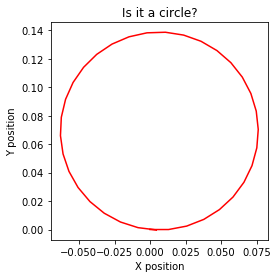

In [2]:
from unit_test import UnitTestOdometry

R = 0.033
baseline_wheel2wheel = 0.108

UnitTestOdometry(R, baseline_wheel2wheel, poseEstimation)


### Run the Activity

** TODO: Jacopo write the testing experience both in simulation and on the real robot**

Objective is drive robot around and see the odometry track

In [ ]:
! cd .. && dts exercises build

### Run the Activity in simulation

In [ ]:
! cd .. && dts exercises test --sim

After running the above command, open the following link http://localhost:8087 you will visualize the VNC. Then from the VNC open RVIZ, press the `Add` on the bottom left side of the window, after that go to the tab `topics` and select `/DUCKIEBOT_NAME/encoder_localization`. Finally open the joystick (on the Desktop) and move the robot. You will see that the pose arrow start moving according to the given commands.

### Run the activity on the Duckiebot

In [ ]:
! cd .. && dts exercises test --duckiebot_name ![DB_NAME] 

After running the above command, open the following link http://localhost:8087 you will visualize the VNC. Then from the VNC open RVIZ, press the `Add` on the bottom left side of the window, after that go to the tab `topics` and select `/DUCKIEBOT_NAME/encoder_localization`. Finally open the joystick (on the Desktop) and move the robot. You will see that the pose arrow start moving according to the given commands.